# HW4 DATA Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Chapter 10 - Visualizing Proportions

In [2]:
#Import the data set
df = pd.read_csv("Data Science Jobs Salaries.csv") 
df.head()

work_year experience_level employment_type                  job_title  \
0     2021e               EN              FT    Data Science Consultant   
1      2020               SE              FT             Data Scientist   
2     2021e               EX              FT       Head of Data Science   
3     2021e               EX              FT               Head of Data   
4     2021e               EN              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   54000             EUR          64369                 DE            50   
1   60000             EUR          68428                 GR           100   
2   85000             USD          85000                 RU             0   
3  230000             USD         230000                 RU            50   
4  125000             USD         125000                 US           100   

  company_location company_size  
0               DE            L  
1               US            L  
2               RU            M  
3               RU            L  
4               US            S

In [3]:
print ('Dataset has',df.shape[0],'rows and ',df.shape[1],' columns')

Dataset has 245 rows and  11  columns


In [4]:
df.describe(include=['object','float64','int64'])

work_year experience_level employment_type       job_title  \
count        245              245             245             245   
unique         2                4               4              43   
top        2021e               MI              FT  Data Scientist   
freq         179              103             231              59   
mean         NaN              NaN             NaN             NaN   
std          NaN              NaN             NaN             NaN   
min          NaN              NaN             NaN             NaN   
25%          NaN              NaN             NaN             NaN   
50%          NaN              NaN             NaN             NaN   
75%          NaN              NaN             NaN             NaN   
max          NaN              NaN             NaN             NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   2.450000e+02             245     245.000000                245   
unique           NaN              15            NaN                 45   
top              NaN             USD            NaN                 US   
freq             NaN             126            NaN                 92   
mean    5.025418e+05             NaN   99868.012245                NaN   
std     2.276230e+06             NaN   83983.326949                NaN   
min     4.000000e+03             NaN    2876.000000                NaN   
25%     6.000000e+04             NaN   45896.000000                NaN   
50%     1.030000e+05             NaN   81000.000000                NaN   
75%     1.740000e+05             NaN  130000.000000                NaN   
max     3.040000e+07             NaN  600000.000000                NaN   

        remote_ratio company_location company_size  
count     245.000000              245          245  
unique           NaN               41            3  
top              NaN               US            L  
freq             NaN              108          132  
mean       69.183673              NaN          NaN  
std        37.593421              NaN          NaN  
min         0.000000              NaN          NaN  
25%        50.000000              NaN          NaN  
50%       100.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
print('\033[1m' + '\033[94m' + 'work_year' + '\033[0m : ', df['work_year'].unique())
print('\033[1m' + '\033[94m' + 'experience_level' + '\033[0m : ',df['experience_level'].unique())
print('\033[1m' + '\033[94m' + 'employment_type' + '\033[0m : ',df['employment_type'].unique())
print('\033[1m' + '\033[94m' + 'job_title' + '\033[0m : ',df['job_title'].unique())
print('\033[1m' + '\033[94m' + 'employee_residence' + '\033[0m : ',df['employee_residence'].unique())
print('\033[1m' + '\033[94m' + 'salary_currency' + '\033[0m : ',df['salary_currency'].unique())
print('\033[1m' + '\033[94m' + 'remote_ratio' + '\033[0m : ',df['remote_ratio'].unique())
print('\033[1m' + '\033[94m' + 'company_location' + '\033[0m : ',df['company_location'].unique())
print('\033[1m' + '\033[94m' + 'company_size' + '\033[0m : ',df['company_size'].unique())

work_year :  ['2021e' '2020']
experience_level :  ['EN' 'SE' 'EX' 'MI']
employment_type :  ['FT' 'PT' 'CT' 'FL']
job_title :  ['Data Science Consultant' 'Data Scientist' 'Head of Data Science'
 'Head of Data' 'Machine Learning Engineer' 'Data Analytics Manager'
 'Research Scientist' 'Data Analyst' 'Data Engineer'
 'Data Science Engineer' 'Manager Data Science' 'Data Engineering Manager'
 'AI Scientist' '3D Computer Vision Researcher' 'ML Engineer'
 'Applied Data Scientist' 'Director of Data Science'
 'Data Analytics Engineer' 'Lead Data Analyst' 'BI Data Analyst'
 'Machine Learning Scientist' 'Machine Learning Infrastructure Engineer'
 'Marketing Data Analyst' 'Lead Data Engineer'
 'Director of Data Engineering' 'Computer Vision Software Engineer'
 'Financial Data Analyst' 'Cloud Data Engineer' 'Principal Data Analyst'
 'Big Data Architect' 'Lead Data Scientist' 'Data Architect'
 'Big Data Engineer' 'Staff Data Scientist' 'Data Science Manager'
 'Business Data Analyst' 'Principal Data 

In [8]:
df.work_year = df.work_year.replace("2021e", "2021")
print('\033[1m' + '\033[94m' + 'work_year' + '\033[0m : ', df['work_year'].unique())

work_year :  ['2021' '2020']


In [9]:
from datetime import datetime
date_time_obj =pd.to_datetime(df['work_year'], format='%Y')
print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)

The type of the date is now <class 'pandas.core.series.Series'>
The date is 0     2021-01-01
1     2020-01-01
2     2021-01-01
3     2021-01-01
4     2021-01-01
         ...    
240   2020-01-01
241   2021-01-01
242   2020-01-01
243   2020-01-01
244   2021-01-01
Name: work_year, Length: 245, dtype: datetime64[ns]


In [10]:
ex_level = df.experience_level.value_counts()
ex_level


MI    103
SE     77
EN     54
EX     11
Name: experience_level, dtype: int64

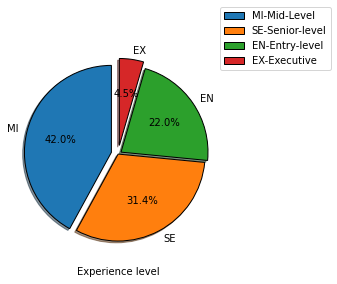

In [11]:
fig,ax = plt.subplots()
explode = [0.08,0,0.04,0.1]
label= ex_level.index 
label_full = ['MI-Mid-Level','SE-Senior-level','EN-Entry-level','EX-Executive']
ax.pie(ex_level, wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode,labels=label);
ax.set_xlabel('Experience level');
ax.legend(loc='upper right',labels=label_full,bbox_to_anchor=(1.5,1.2));
plt.show();

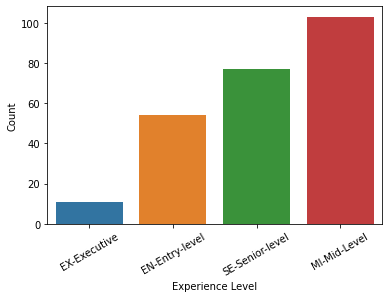

In [12]:
g = sns.barplot(y = ex_level,
            x = ex_level.index,
            data = ex_level)
label_full = ['EX-Executive','EN-Entry-level','SE-Senior-level','MI-Mid-Level']
g.set_xticklabels(labels = label_full, rotation=30);
g.set_xlabel('Experience Level')
g.set_ylabel('Count')
# Show the plot
plt.show()

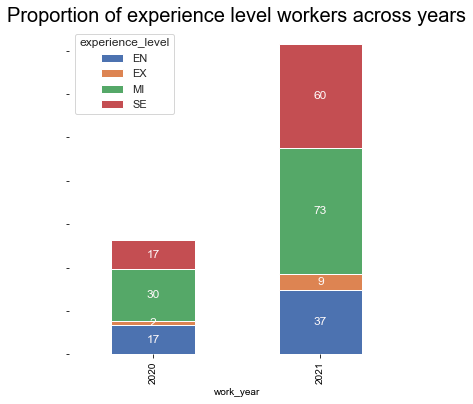

In [13]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6, 6))

sns.set(style="white")
df_plot = df.groupby(['experience_level', 'work_year']).size().reset_index().pivot(columns='experience_level', index='work_year', values=0)
df_plot.plot(kind='bar', stacked=True,ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], label_type='center',color='snow')
ax.bar_label(ax.containers[0], label_type='center',color='snow')
ax.bar_label(ax.containers[1], label_type='center',color='snow')
ax.bar_label(ax.containers[2], label_type='center',color='snow')

ax.set_title("Proportion of experience level workers across years",fontsize=20)
ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


In [14]:
ex_l = df.groupby(['work_year','experience_level']).size().to_frame(name = 'counts').reset_index()
print(ex_l)


  work_year experience_level  counts
0      2020               EN      17
1      2020               EX       2
2      2020               MI      30
3      2020               SE      17
4      2021               EN      37
5      2021               EX       9
6      2021               MI      73
7      2021               SE      60


In [15]:
ex_2020 = ex_l[ex_l['work_year'] == '2020']

ex_2021 = ex_l[ex_l['work_year'] == '2021']
ex_2020,ex_2021

(  work_year experience_level  counts
 0      2020               EN      17
 1      2020               EX       2
 2      2020               MI      30
 3      2020               SE      17,
   work_year experience_level  counts
 4      2021               EN      37
 5      2021               EX       9
 6      2021               MI      73
 7      2021               SE      60)

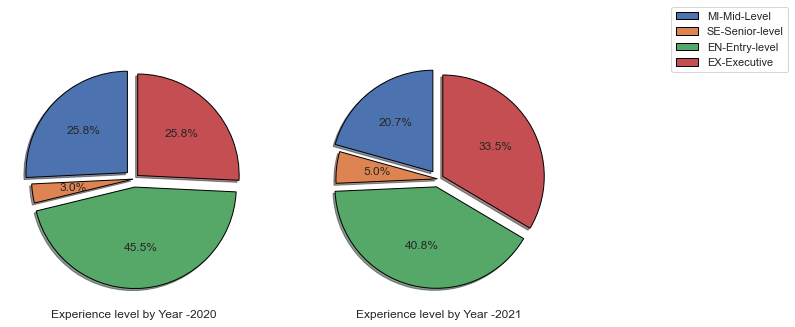

In [16]:
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
explode = [0.09,0.01,0.08,0.05]
label=ex_level.index
label_full = ['MI-Mid-Level','SE-Senior-level','EN-Entry-level','EX-Executive']
ax[0].pie(ex_2020.counts, wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode);
ax[0].set_xlabel('Experience level by Year -2020');
ax[1].pie(ex_2021.counts, wedgeprops = {'edgecolor': 'black'},shadow=True,startangle=90,autopct='%1.1f%%',explode=explode);
ax[1].set_xlabel('Experience level by Year -2021');
ax[1].legend(loc='upper right',labels=label_full,bbox_to_anchor=(1.9,1.2));
plt.show();


In [17]:
by_yr_exp = df.groupby(['work_year','experience_level'])

<AxesSubplot:xlabel='work_year'>

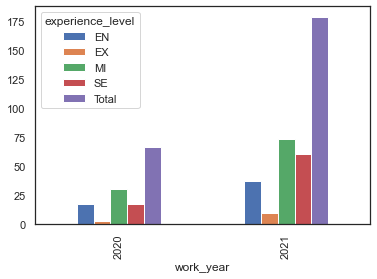

In [18]:
by_yr_exp_sz = by_yr_exp.size().unstack()
by_yr_exp_sz
by_yr_exp_sz['Total'] = by_yr_exp_sz.sum(axis=1)
by_yr_exp_sz.plot(kind='bar',style='ggplot')


In [19]:
cross_tab_prop = pd.crosstab(index=df['work_year'],
                             columns=df['remote_ratio'],
                             normalize="index")
cross_tab_prop

remote_ratio       0         50        100
work_year                                 
2020          0.196970  0.303030  0.500000
2021          0.150838  0.284916  0.564246

In [20]:
cross_tab = pd.crosstab(index=df['work_year'],
                        columns=df['remote_ratio'])
cross_tab

remote_ratio  0    50   100
work_year                  
2020           13   20   33
2021           27   51  101

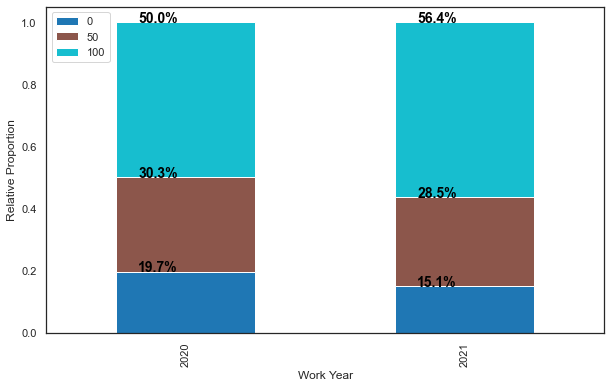

In [21]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left")
plt.xlabel("Work Year")
plt.ylabel("Relative Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=14,
                 fontweight="bold")
plt.show()

In [22]:
fig = px.area(df, x="work_year", y="salary_in_usd", color="remote_ratio", title="", color_discrete_sequence=["#FDB714", "#009CA7", "#F05023"])
fig.show()


In [23]:
x1=pd.value_counts(df["employment_type"]) / df["employment_type"].shape[0]
x1

FT    0.942857
PT    0.028571
CT    0.016327
FL    0.012245
Name: employment_type, dtype: float64

No handles with labels found to put in legend.


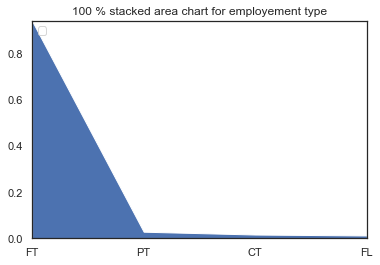

In [24]:
# Make the plot
plt.stackplot(x1.index,  x1)
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart for employement type')
plt.show()

In [25]:

# Make data
data = df[['salary','salary_in_usd']].copy()
data

salary  salary_in_usd
0      54000          64369
1      60000          68428
2      85000          85000
3     230000         230000
4     125000         125000
..       ...            ...
240   412000         412000
241   151000         151000
242   105000         105000
243   100000         100000
244  7000000          94917

[245 rows x 2 columns]

In [26]:
x=data.sum(axis=1)
x

0       118369
1       128428
2       170000
3       460000
4       250000
        ...   
240     824000
241     302000
242     210000
243     200000
244    7094917
Length: 245, dtype: int64

In [27]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
data_perc

salary  salary_in_usd
0    0.456201       0.543799
1    0.467188       0.532812
2    0.500000       0.500000
3    0.500000       0.500000
4    0.500000       0.500000
..        ...            ...
240  0.500000       0.500000
241  0.500000       0.500000
242  0.500000       0.500000
243  0.500000       0.500000
244  0.986622       0.013378

[245 rows x 2 columns]

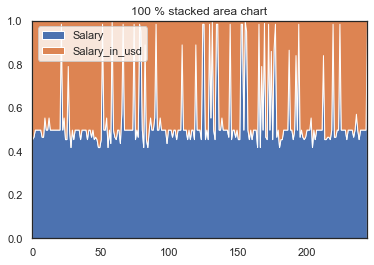

In [28]:
# Make the plot
plt.stackplot(range(0,245),  data_perc["salary"],  data_perc["salary_in_usd"], labels=['Salary','Salary_in_usd'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

In [29]:
x = (df[df['company_size'] == 'S']['salary_in_usd'])
y = (df[df['company_size'] == 'M']['salary_in_usd'])
z = (df[df['company_size'] == 'L']['salary_in_usd'])
len(x),len(y),len(z)


(58, 55, 132)

In [30]:
trailing_zeros_x = pd.Series([0]*(len(z)-len(x)))
x=x.append(trailing_zeros_x)
len(x)

132

In [31]:
trailing_zeros_y = pd.Series([0]*(len(z)-len(y)))
y=y.append(trailing_zeros_y)
len(y)

132

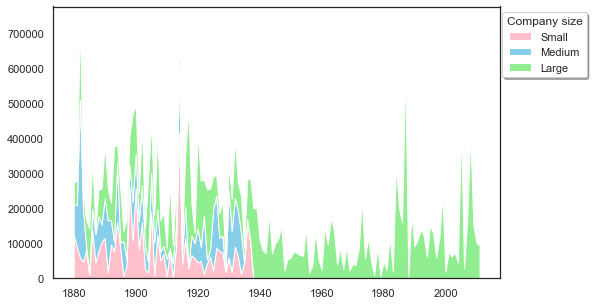

In [32]:
year = [i+1880 for i in range(132)]

fig = plt.figure(figsize=(8,5))

colors = ['pink','skyblue','lightgreen']

labels = ("Small", "Medium", "Large")

plt.stackplot(year,x,y,z, colors=colors, labels=labels)
plt.legend(title='Company size',loc='upper center', bbox_to_anchor=(1.1, 1.0), shadow=True, ncol=1)

plt.show()

<AxesSubplot:xlabel='salary', ylabel='Density'>

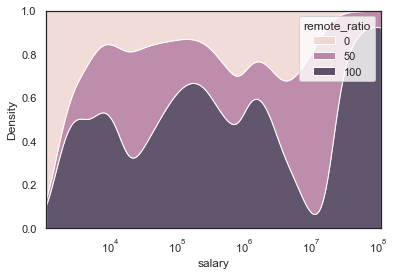

In [33]:
sns.kdeplot(data=df, x="salary", hue="remote_ratio", log_scale=True,multiple="fill")

<AxesSubplot:xlabel='salary', ylabel='Density'>

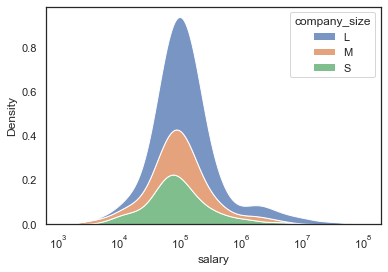

In [34]:
sns.kdeplot(data=df, x="salary", hue="company_size", log_scale=True,multiple="stack")

In [35]:
x = df[df['company_size'] == 'S']
y = df[df['company_size'] == 'M']
z = df[df['company_size'] == 'L']
x

work_year experience_level employment_type  \
4        2021               EN              FT   
17       2021               EN              FT   
18       2021               EN              FT   
24       2021               MI              FT   
31       2021               SE              FT   
32       2020               EN              FT   
33       2020               EN              FT   
38       2020               MI              FT   
45       2021               EN              FT   
48       2021               SE              FT   
53       2021               SE              FT   
60       2020               EN              PT   
61       2021               MI              FT   
64       2020               MI              FT   
69       2021               SE              FT   
76       2021               EN              FT   
78       2020               EN              FT   
79       2020               SE              FT   
94       2020               SE              FT   
95       2021               MI              FT   
100      2021               SE              FT   
114      2021               EN              FT   
122      2021               SE              FT   
123      2021               MI              FT   
125      2021               MI              FT   
127      2020               SE              FT   
136      2021               EN              FT   
142      2020               SE              FT   
143      2020               EN              FT   
145      2021               EX              FT   
153      2021               MI              FT   
154      2021               EN              FT   
156      2021               MI              FT   
157      2021               EN              FT   
162      2021               EX              CT   
169      2020               EN              FT   
170      2020               SE              FT   
174      2021               EN              PT   
180      2021               MI              FT   
181      2021               MI              FT   
187      2020               EN              FT   
189      2021               SE              FT   
192      2021               MI              FT   
195      2020               MI              FT   
197      2020               EN              FT   
199      2020               EN              PT   
203      2021               SE              FT   
206      2021               SE              FT   
207      2021               MI              FT   
209      2021               MI              FT   
210      2020               SE              FL   
219      2021               EN              FT   
220      2020               SE              FT   
221      2020               MI              FT   
225      2021               EN              PT   
234      2020               SE              FT   
235      2021               SE              FT   
242      2020               EN              FT   

                             job_title   salary salary_currency  \
4            Machine Learning Engineer   125000             USD   
17                        Data Analyst    90000             USD   
18                        Data Analyst    60000             USD   
24           Machine Learning Engineer    40000             EUR   
31                        Data Analyst    80000             USD   
32                        Data Analyst    10000             USD   
33           Machine Learning Engineer   138000             USD   
38                      Data Scientist    45760             USD   
45             Data Science Consultant    65000             EUR   
48                  Lead Data Engineer    75000             GBP   
53                       Data Engineer   115000             USD   
60                         ML Engineer    14000             EUR   
61   Computer Vision Software Engineer    81000             EUR   
64                      Data Scientist    60000             GBP   
69                 Cloud Data Engineer   160000 

In [36]:
total_sal = df.salary.sum()
total_sal

123122744

In [37]:
sal_company_s = x.salary.sum()/total_sal
sal_company_s

0.10991658860364581

In [38]:
sal_company_m = y.salary.sum()/total_sal
sal_company_m

0.09881958933598815

In [39]:
sal_company_l = z.salary.sum()/total_sal
sal_company_l

0.791263822060366

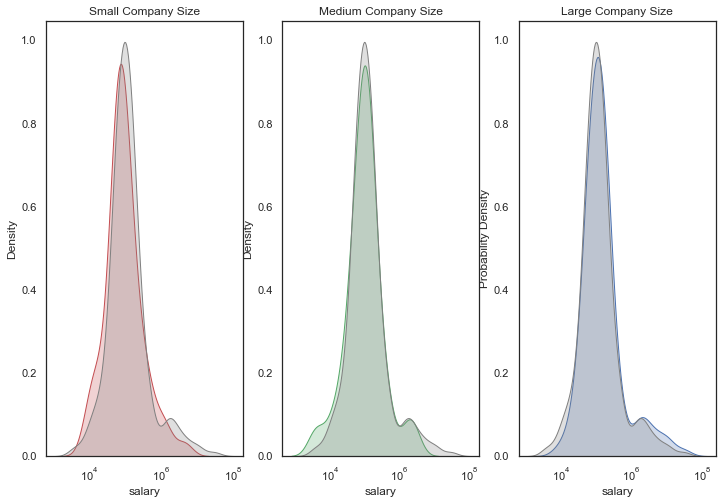

In [40]:
# Plotting the KDE Plot
fig,ax = plt.subplots(ncols=3,figsize=(12,8))

sns.kdeplot(x['salary'], color='r', shade=True, Label='Small',log_scale=True,ax=ax[0]);
sns.kdeplot(df['salary'], color='grey', shade=True, Label='Total',log_scale=True,ax=ax[0]);

sns.kdeplot(y['salary'], color='g', shade=True, Label='Medium',log_scale=True,ax=ax[1]);
sns.kdeplot(df['salary'], color='grey', shade=True, Label='Total',log_scale=True,ax=ax[1]);

sns.kdeplot(z['salary'], color='b', shade=True, Label='Large',log_scale=True,ax=ax[2]);
sns.kdeplot(df['salary'], color='grey', shade=True, Label='Total',log_scale=True,ax=ax[2]);

ax[0].set_title("Small Company Size")
ax[1].set_title("Medium Company Size")
ax[2].set_title("Large Company Size")

plt.ylabel('Probability Density');

In [41]:
x1=pd.value_counts(df["employment_type"]) 

x1

FT    231
PT      7
CT      4
FL      3
Name: employment_type, dtype: int64

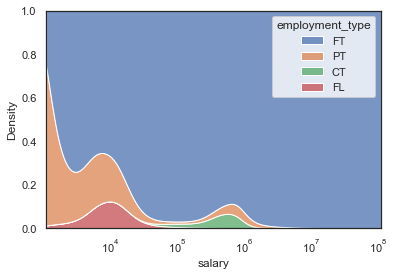

In [42]:

sns.kdeplot(data=df, x="salary", hue="employment_type", multiple="fill",log_scale=True)
plt.show()

## Q11 Visualizing Nested Proportions

#### MOSAIC plot

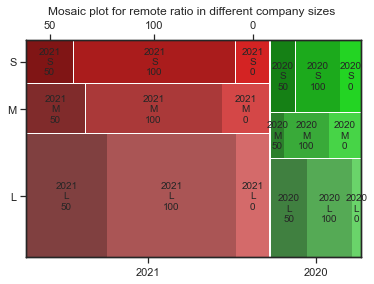

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
### mosaic plot
mosaic(df, ['work_year', 'company_size','remote_ratio'], title='Mosaic plot for remote ratio in different company sizes ')
plt.show()

#### Treemap 

['EN', 'EX', 'MI', 'SE']
[3800, 800, 6700, 5650]


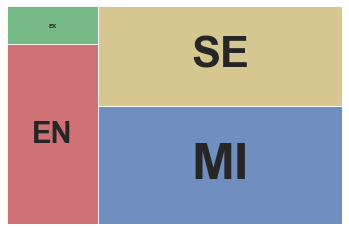

In [44]:
import squarify

a = df.groupby('experience_level')[['remote_ratio']].sum().index.get_level_values(0).tolist()
print(a)
d = df.groupby('experience_level')[['remote_ratio']].sum().reset_index().remote_ratio.values.tolist()
print(d)
ax = squarify.plot(sizes=d, label=a,color=['r','g','b','y'], alpha=.8)
for i in range(4):
    ax.texts[i].set_size(d[i]/130)
    ax.texts[i].set_weight('bold')
plt.axis('off')
plt.show()

In [45]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

df["all"] = "all" # in order to have a single root node
# print(df)
fig = px.treemap(df, path=['all', 'company_size', 'employment_type', 'job_title' , 'salary_currency' , 'salary'], values='salary' , maxdepth=4)
fig.update_traces(root_color="lightgrey")
fig.update_layout( 
    uniformtext=dict(minsize=18),
    treemapcolorway = ["salmon", "green" , "orange"],
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

#### Nested Pie

In [46]:
employment_type_remote_salary =  df.groupby(['employment_type','remote_ratio'],as_index=False).salary.mean()
print(employment_type_remote_salary)

  employment_type  remote_ratio         salary
0              CT           100  222750.000000
1              FL             0   20000.000000
2              FL            50   12000.000000
3              FL           100   60000.000000
4              FT             0  443936.538462
5              FT            50  635818.507463
6              FT           100  492243.032000
7              PT            50  199666.666667
8              PT           100   24250.000000


In [47]:
experience_remote_salary =  df.groupby(['experience_level','remote_ratio'],as_index=False).salary.mean()
print(experience_remote_salary)

   experience_level  remote_ratio         salary
0                EN             0  162000.000000
1                EN            50  305602.444444
2                EN           100  452212.827586
3                EX             0  102500.000000
4                EX            50  150000.000000
5                EX           100  273571.428571
6                MI             0  431834.523810
7                MI            50  816062.533333
8                MI           100  755086.730769
9                SE             0  692600.000000
10               SE            50  615624.761905
11               SE           100  180102.108696


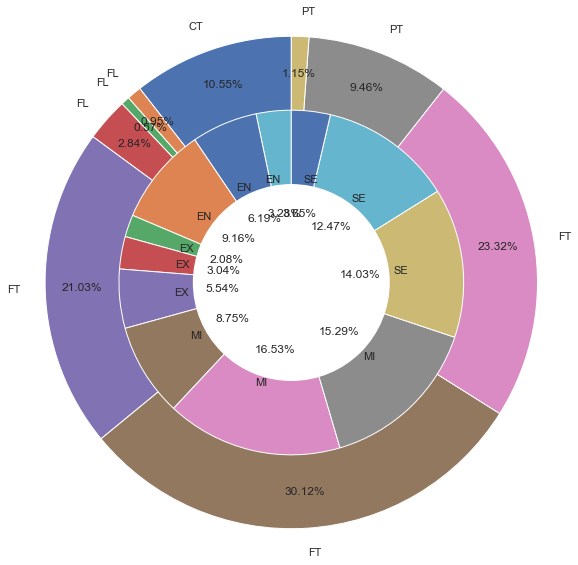

In [48]:
plt.figure(figsize=(8, 8)) # change the size of a figure
labels = employment_type_remote_salary['employment_type']
sizes = employment_type_remote_salary['salary']
labels_subgroup = experience_remote_salary['experience_level']    
sizes_subgroup = experience_remote_salary['salary'] 

 
outside_donut = plt.pie(sizes, labels=labels, 
 startangle=90, frame=True,
 autopct='%.2f%%',
 pctdistance =0.85) 
inside_donut = plt.pie(sizes_subgroup, labels=labels_subgroup,
 radius=0.7,
 startangle=90, labeldistance=0.6,
 autopct='%.2f%%',
 pctdistance =0.4) 
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [49]:

title = df.groupby('salary_currency').agg('count')
title_labels = title.work_year.sort_values().index 
title_counts = title.work_year.sort_values()

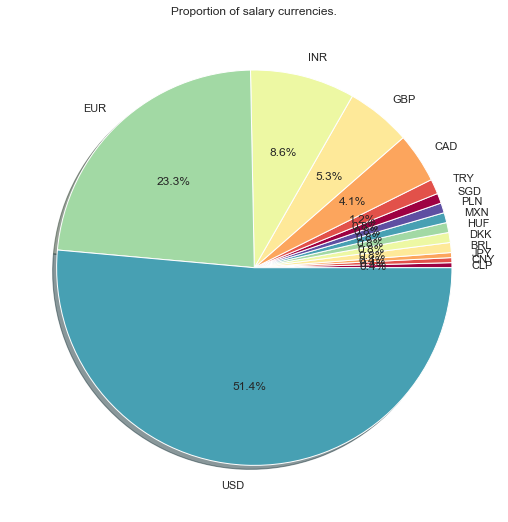

In [50]:
from matplotlib.gridspec import GridSpec

plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Proportion of salary currencies.')
type_show_ids = plt.pie(title_counts, labels=title_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [51]:
#### Parallel sets

In [52]:
import plotly.express as px

fig = px.parallel_categories(df)
fig.show()

In [53]:
fig = px.parallel_categories(df, dimensions=['work_year', 'company_size', 'remote_ratio'],
                color="salary_in_usd", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'work_year':'2020-2021', 'company_size':'Company size(S<M<L)', 'remote_ratio':'remote ratio(0<50<100)'})

fig.show()

## Chapter 12 - Visualizing Associations Among Two or More Quantitative Variables

In [54]:
#Import the data set
df_ht = pd.read_csv("bodyPerformance.csv") 
df_ht.head()


age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [55]:
df_ht['class_num'] = df_ht['class']

df_ht['class_num'].replace(['A','B','C','D'],
                        [0,1,2,3], inplace=True)

In [56]:
df_ht['class'] = df_ht['class_num'].map(df_ht['class'])
df_ht


age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

      class  class_num  
0         C          2  
1         C          0  
2         C          2  
3         A          1  
4         A          1  
...     ...        ...  
13388     C          2  
13389     B          3  
13390     C          0  
13391     B          3  
13392     C          2  

[13393 rows x 13 columns]

In [57]:
df_ht.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
class_num                  0
dtype: int64

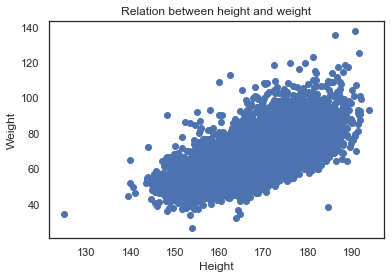

In [58]:
plt.scatter(df_ht.height_cm,df_ht.weight_kg)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Relation between height and weight')
plt.show()


#### ht and wt are linearly correlated.

<AxesSubplot:xlabel='height_cm', ylabel='weight_kg'>

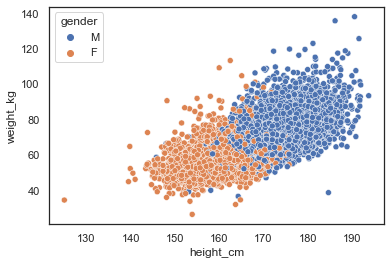

In [59]:
sns.scatterplot(x="height_cm",
                    y="weight_kg",
                    hue="gender",
                    data=df_ht)

#### Female Height and Weight are relatively less than males

In [60]:
fem = df_ht[df_ht['gender']=='F']
fem
male = df_ht[df_ht['gender']=='M']
male

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13387  39.0      M      174.4      70.80        24.3       78.0     132.0   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13387       41.6                     12.0            44.0          168.0   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13392       35.9                      7.1            51.0          180.0   

      class  class_num  
0         C          2  
1         C          0  
2         C          2  
3         A          1  
4         A          1  
...     ...        ...  
13387     A          1  
13388     C          2  
13389     B          3  
13390     C          0  
13392     C          2  

[8467 rows x 13 columns]

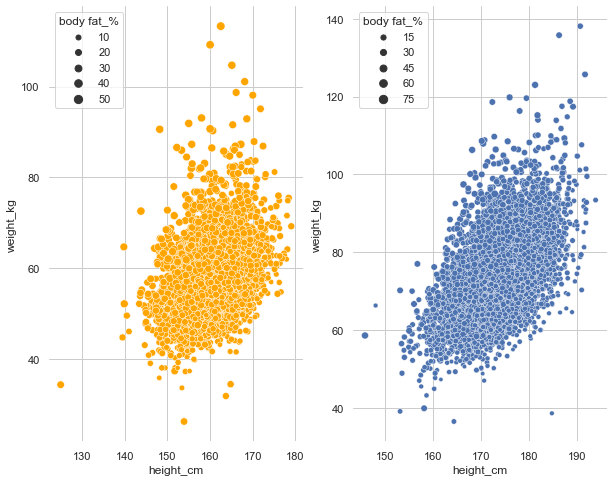

In [61]:
fig,ax=plt.subplots(ncols=2,figsize=(10,8))
sns.scatterplot(x="height_cm",
                    y="weight_kg",
                    size='body fat_%',
                    color='orange',
                    data=fem,ax=ax[0])
ax[0].grid(True)
sns.scatterplot(x="height_cm",
                    y="weight_kg",
                    size='body fat_%',
                    data=male,ax=ax[1])
ax[1].grid(True)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

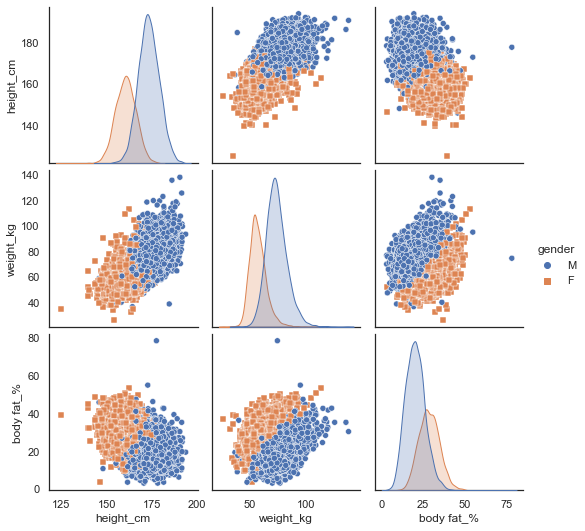

In [62]:
sns.pairplot(df_ht, vars = df_ht.columns[2:5], hue ="gender", markers=["o", "s"])

In [63]:
df_pca = df_ht[["age","height_cm","weight_kg","body fat_%","diastolic","systolic","gripForce","sit and bend forward_cm","sit-ups counts","broad jump_cm"]]

<AxesSubplot:>

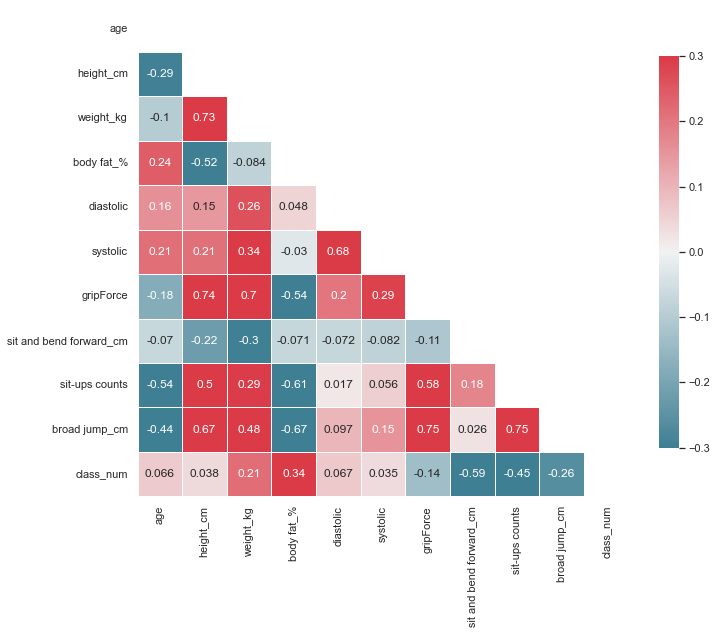

In [64]:
corr = df_ht.corr()

# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros with the same shape and type of corr.
mask[np.triu_indices_from(mask)] = True # return indexes of upper triangle of array 

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=False,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .8}  # Extra kwargs for the legend; in this case, shrink by 50%
)


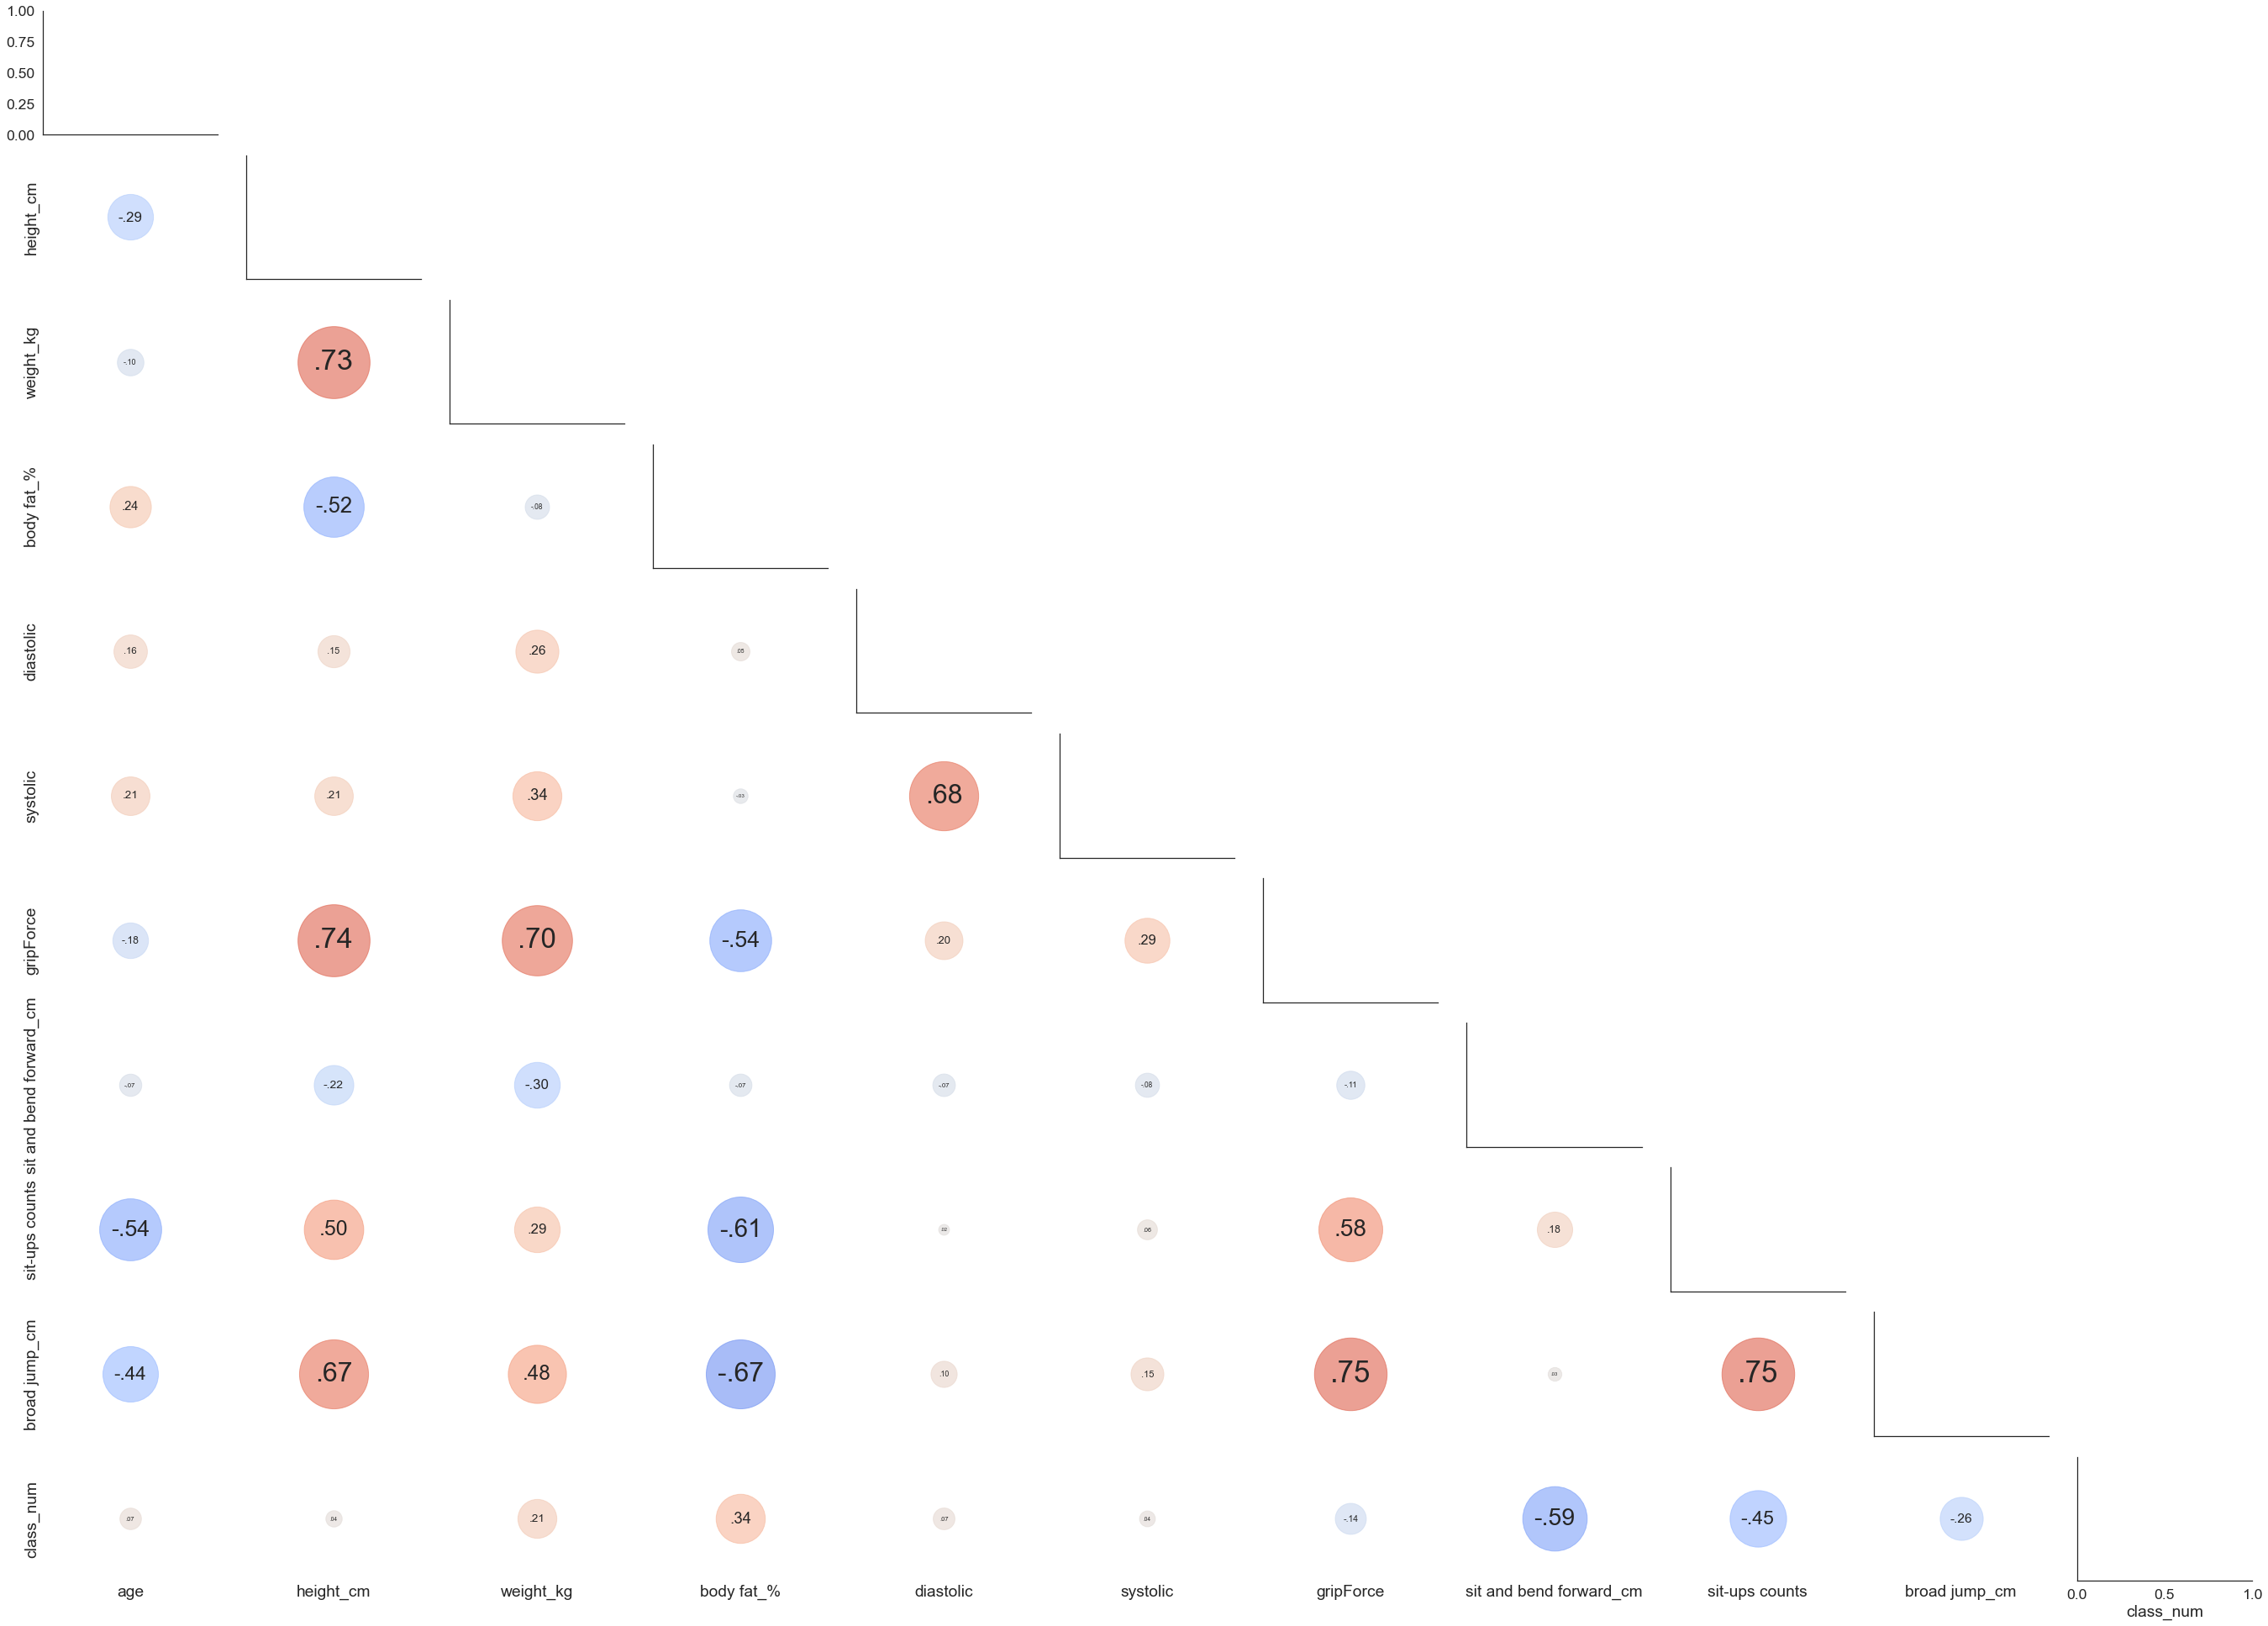

In [65]:

def correlationdotplot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_ht, aspect=1.4, diag_sharey=True,corner=True,despine=True)
g.map_lower(correlationdotplot)
#g.map_diag(sns.histplot)





In [66]:

df_pca

age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0      27.0      172.3      75.24        21.3       80.0     130.0       54.9   
1      25.0      165.0      55.80        15.7       77.0     126.0       36.4   
2      31.0      179.6      78.00        20.1       92.0     152.0       44.8   
3      32.0      174.5      71.10        18.4       76.0     147.0       41.4   
4      28.0      173.8      67.70        17.1       70.0     127.0       43.5   
...     ...        ...        ...         ...        ...       ...        ...   
13388  25.0      172.1      71.80        16.2       74.0     141.0       35.8   
13389  21.0      179.7      63.90        12.1       74.0     128.0       33.0   
13390  39.0      177.2      80.50        20.1       78.0     132.0       63.5   
13391  64.0      146.1      57.70        40.4       68.0     121.0       19.3   
13392  34.0      164.0      66.10        19.5       82.0     150.0       35.9   

       sit and bend forward_cm  sit-ups counts  broad jump_cm  
0                         18.4            60.0          217.0  
1                         16.3            53.0          229.0  
2                         12.0            49.0          181.0  
3                         15.2            53.0          219.0  
4                         27.1            45.0          217.0  
...                        ...             ...            ...  
13388                     17.4            47.0          198.0  
13389                      1.1            48.0          167.0  
13390                     16.4            45.0          229.0  
13391                      9.2             0.0           75.0  
13392                      7.1            51.0          180.0  

[13393 rows x 10 columns]

In [67]:
scaler=StandardScaler()
scaler.fit(df_pca)

StandardScaler()

In [68]:
body_scaled = scaler.transform(df_pca)
body_scaled.shape

(13393, 10)

In [69]:
body_pca=PCA(n_components=2)
body_pca.fit(body_scaled)

PCA(n_components=2)

In [70]:
f_pca=body_pca.transform(body_scaled)
f_pca.shape, body_scaled.shape
f_pca

array([[-2.19879402,  0.46431287],
       [-0.70776841,  1.54942419],
       [-1.90329221, -1.52972219],
       ...,
       [-2.55812975, -0.36411672],
       [ 5.79911487, -1.19021614],
       [-0.35801504, -0.65547523]])

In [71]:
body_pca.explained_variance_ratio_

array([0.41810584, 0.20538777])

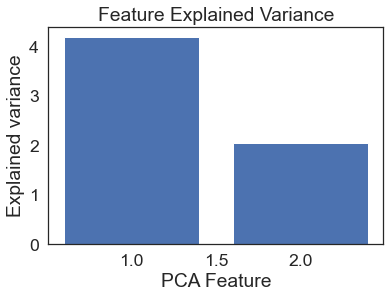

In [72]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(body_pca.explained_variance_)+1),
    body_pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

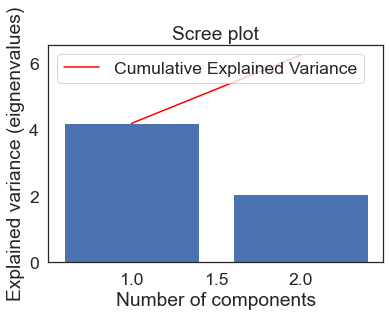

In [73]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(body_pca.explained_variance_)+1),
    body_pca.explained_variance_
    )
 
plt.plot(
    range(1,len(body_pca.explained_variance_ )+1),
    np.cumsum(body_pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot');

#### The loading plot shows vectors starting from the origin to the loadings of each feature.

#### The loadings (or weights) are the correlation coefficients between the original features and the principal components.

#### The loadings represent the elements of the eigenvector.

#### The loading plot shows which features impact which principal component and by how much.

#### Plot the correlation coefficients (loadings) of each feature.

In [74]:
# Principal components correlation coefficients
loadings = body_pca.components_
 
# Number of features before PCA
n_features = body_pca.n_features_
 
# Feature names before PCA
feature_names = df_pca.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

PC1       PC2
feature_names                              
age                      0.208089 -0.379252
height_cm               -0.420726 -0.075888
weight_kg               -0.337152 -0.299732
body fat_%               0.330651 -0.239996
diastolic               -0.106119 -0.508806
systolic                -0.143469 -0.521574
gripForce               -0.432373 -0.095470
sit and bend forward_cm  0.045463  0.275295
sit-ups counts          -0.378518  0.265119
broad jump_cm           -0.438810  0.129841

#### plot the directionality of the correlation by adding arrows from the origin (0, 0) to each of the coefficients

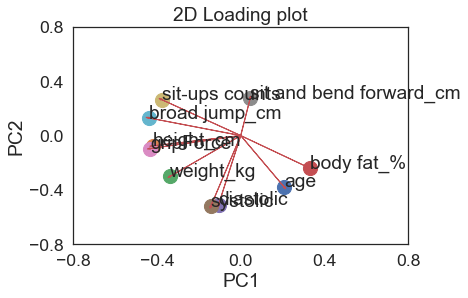

In [75]:

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

In [76]:
pca_df = pd.DataFrame(data=f_pca, columns=['PC1', 'PC2'])
pca_df

PC1       PC2
0     -2.198794  0.464313
1     -0.707768  1.549424
2     -1.903292 -1.529722
3     -1.678080 -0.014424
4     -1.200588  1.438134
...         ...       ...
13388 -1.076931  0.506786
13389 -1.013627  0.756400
13390 -2.558130 -0.364117
13391  5.799115 -1.190216
13392 -0.358015 -0.655475

[13393 rows x 2 columns]

In [77]:
target_names = {
    0:'A-best',
    1:'B-good', 
    2:'C-avg',
    3:'D-bad'
}
 
pca_df['target'] = df_ht.class_num
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

PC1       PC2  target
0     -2.198794  0.464313   C-avg
1     -0.707768  1.549424  A-best
2     -1.903292 -1.529722   C-avg
3     -1.678080 -0.014424  B-good
4     -1.200588  1.438134  B-good
...         ...       ...     ...
13388 -1.076931  0.506786   C-avg
13389 -1.013627  0.756400   D-bad
13390 -2.558130 -0.364117  A-best
13391  5.799115 -1.190216   D-bad
13392 -0.358015 -0.655475   C-avg

[13393 rows x 3 columns]

Text(33.19060000000001, 0.5, '2nd Principle component')

<Figure size 576x432 with 0 Axes>

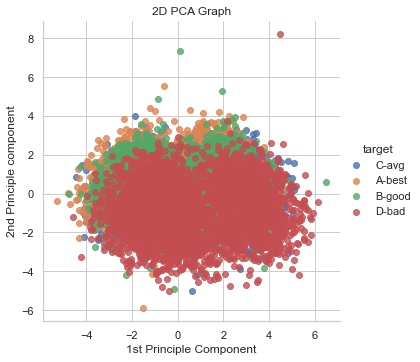

In [78]:
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')

plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle component')

#### Group A with best physique is clearly separated with group D who did not do any activity( Green and Peach).

In [79]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

pca_df_scaled

PC1       PC2  target
0     -0.186308  0.032994   C-avg
1     -0.059970  0.110101  A-best
2     -0.161269 -0.108701   C-avg
3     -0.142187 -0.001025  B-good
4     -0.101728  0.102193  B-good
...         ...       ...     ...
13388 -0.091250  0.036012   C-avg
13389 -0.085886  0.053749   D-bad
13390 -0.216755 -0.025874  A-best
13391  0.491369 -0.084576   D-bad
13392 -0.030335 -0.046578   C-avg

[13393 rows x 3 columns]

Text(16.585, 0.5, 'PC2')

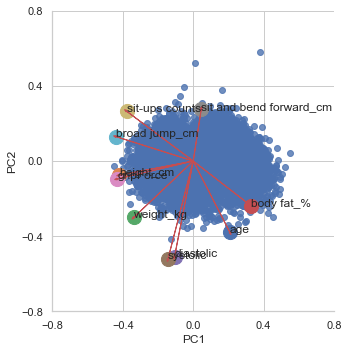

In [80]:
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

#### Using the loading plots and the scaled plots we can now show the correlation coefficients against the PCA scatterplot on the same graph

#### Another sklearn Cancer Malignant or not dataset with 30 features and target variable with 2 classes

In [81]:
cancer = load_breast_cancer()

In [82]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [91]:
#cancer.target

In [84]:
df_can = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [85]:
df_can

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [86]:
can_scaler=StandardScaler()
can_scaler.fit(df_can)

StandardScaler()

In [87]:
can_scaled = can_scaler.transform(df_can)
can_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [88]:
can_pca=PCA(n_components=2)

In [89]:
can_pca.fit(can_scaled)

PCA(n_components=2)

In [92]:
x_pca=can_pca.transform(can_scaled)
x_pca.shape, can_scaled.shape

((569, 2), (569, 30))

In [93]:
can_pca.explained_variance_ratio_


array([0.44272026, 0.18971182])

In [94]:
x_pca_df = pd.DataFrame(
    data=x_pca, 
    columns=['PC1', 'PC2'])

In [95]:
target_names = {
    0:'Malignant',
    1:'Benign'
}
 
x_pca_df['target'] = cancer['target']
x_pca_df['target'] = x_pca_df['target'].map(target_names)
 
x_pca_df

PC1        PC2     target
0     9.192837   1.948583  Malignant
1     2.387802  -3.768172  Malignant
2     5.733896  -1.075174  Malignant
3     7.122953  10.275589  Malignant
4     3.935302  -1.948072  Malignant
..         ...        ...        ...
564   6.439315  -3.576817  Malignant
565   3.793382  -3.584048  Malignant
566   1.256179  -1.902297  Malignant
567  10.374794   1.672010  Malignant
568  -5.475243  -0.670637     Benign

[569 rows x 3 columns]

<Figure size 576x432 with 0 Axes>

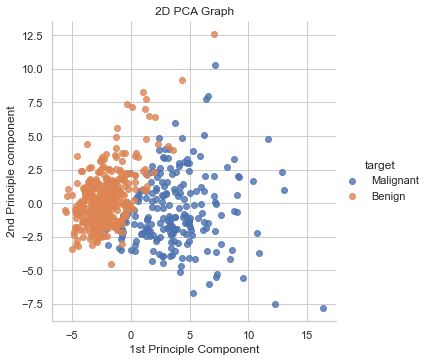

In [96]:
plt.figure(figsize=(8,6))
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=x_pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')

plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle component')
plt.show()

#### Visualizing paired data

In [97]:
df = pd.read_csv("Data Science Jobs Salaries.csv") 
df.work_year = df.work_year.replace("2021e", "2021")
print('\033[1m' + '\033[94m' + 'work_year' + '\033[0m : ', df['work_year'].unique())
date_time_obj =pd.to_datetime(df['work_year'], format='%Y')
print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)


work_year :  ['2021' '2020']
The type of the date is now <class 'pandas.core.series.Series'>
The date is 0     2021-01-01
1     2020-01-01
2     2021-01-01
3     2021-01-01
4     2021-01-01
         ...    
240   2020-01-01
241   2021-01-01
242   2020-01-01
243   2020-01-01
244   2021-01-01
Name: work_year, Length: 245, dtype: datetime64[ns]


In [98]:
by_yr_exp = df.groupby(['work_year','experience_level'])['salary'].agg([np.sum]).reset_index()
#print(by_yr_exp)



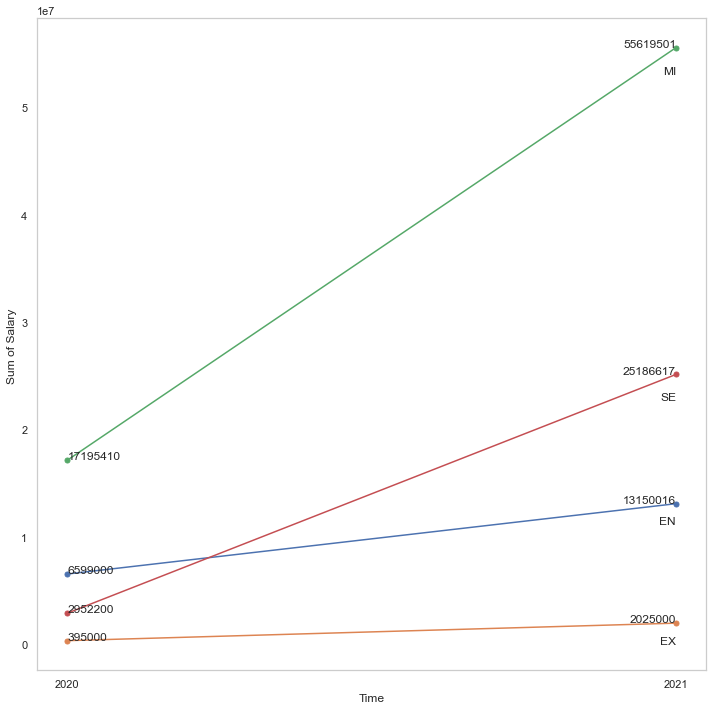

In [99]:

fig, ax = plt.subplots(1, figsize=(12,12))

df_tmp = by_yr_exp[by_yr_exp['experience_level'] == 'EN']
plt.plot(df_tmp['work_year'], df_tmp['sum'],marker='o', markersize=5)
plt.text(df_tmp['work_year'].values[0], df_tmp['sum'].values[0],s=df_tmp['sum'].values[0])
plt.text(df_tmp['work_year'].values[1], df_tmp['sum'].values[1],ha='right',s=df_tmp['sum'].values[1])
plt.text('2021', (df_tmp['sum'].values[1]-2000000),ha='right',s='EN')


df_tmp1 = by_yr_exp[by_yr_exp['experience_level'] == 'EX']
plt.plot(df_tmp1['work_year'], df_tmp1['sum'],marker='o', markersize=5)
plt.text(df_tmp1['work_year'].values[0], df_tmp1['sum'].values[0],s=df_tmp1['sum'].values[0])
plt.text(df_tmp1['work_year'].values[1], df_tmp1['sum'].values[1],ha='right',s=df_tmp1['sum'].values[1])
plt.text('2021', (df_tmp1['sum'].values[1]-2000000),ha='right',s='EX')

df_tmp2 = by_yr_exp[by_yr_exp['experience_level'] == 'MI']
plt.plot(df_tmp2['work_year'], df_tmp2['sum'],marker='o', markersize=5)
plt.text(df_tmp2['work_year'].values[0], df_tmp2['sum'].values[0],s=df_tmp2['sum'].values[0])
plt.text(df_tmp2['work_year'].values[1], df_tmp2['sum'].values[1],ha='right',s=df_tmp2['sum'].values[1])
plt.text('2021', (df_tmp2['sum'].values[1]-2500000),ha='right',s='MI')

df_tmp3 = by_yr_exp[by_yr_exp['experience_level'] == 'SE']
plt.plot(df_tmp3['work_year'], df_tmp3['sum'],marker='o', markersize=5)
plt.text(df_tmp3['work_year'].values[0], df_tmp3['sum'].values[0],s=df_tmp3['sum'].values[0])
plt.text(df_tmp3['work_year'].values[1], df_tmp3['sum'].values[1],ha='right',s=df_tmp3['sum'].values[1])
plt.text('2021', (df_tmp3['sum'].values[1]-2500000),ha='right',s='SE')

plt.xlabel("Time")
plt.ylabel("Sum of Salary ")
plt.grid(False)
plt.show()

## Chapter 13 Visualizing time series and other functions of an independent variable

In [100]:
df1 = pd.read_csv("Superstore.csv") 
df1.columns
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

    Ordermonth   Sales
0            1  215130
1            2  147697
2            3    6495
3            4    5808
4            5    8387
5            6   10898
6            7  112423
7            8  187175
8            9  243686
9           10  223161
10          11  222016
11          12  285184


<AxesSubplot:xlabel='Ordermonth', ylabel='Sales'>

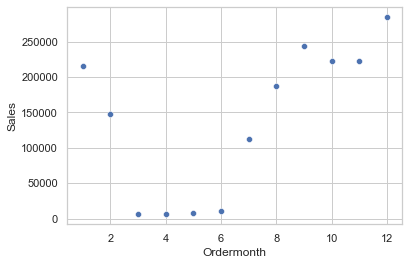

In [101]:
critical_order = df1[df1['Order Priority'] == 'Critical']
critical_order['Order Date'] = pd.to_datetime(critical_order['Order Date'])
critical_order['Orderyear'] = critical_order['Order Date'].dt.year 
critical_order['Ordermonth'] = critical_order['Order Date'].dt.month
critical_order_new = pd.DataFrame(critical_order.groupby([critical_order['Ordermonth']])['Sales'].agg(np.sum).reset_index(name='Sales'))
print(critical_order_new)
sns.scatterplot(data=critical_order_new, x="Ordermonth", y="Sales", )


<AxesSubplot:xlabel='Ordermonth', ylabel='Sales'>

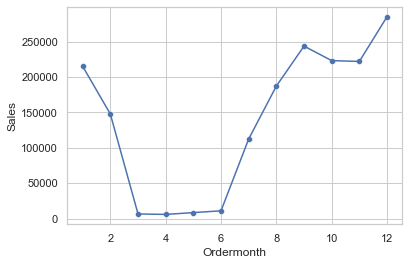

In [102]:
sns.scatterplot(data=critical_order_new, x="Ordermonth", y="Sales" )

sns.lineplot(data=critical_order_new, x="Ordermonth", y="Sales" , )

<AxesSubplot:xlabel='Ordermonth', ylabel='Sales'>

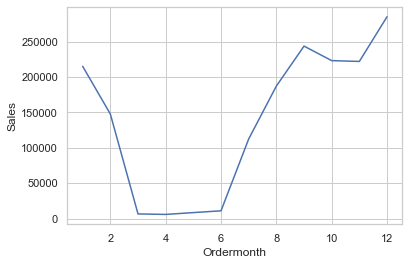

In [103]:
sns.lineplot(data=critical_order_new, x="Ordermonth", y="Sales" , ci=None)

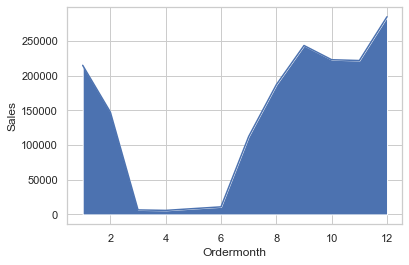

In [104]:
sns.lineplot(data=critical_order_new, x="Ordermonth", y="Sales" , ci=None)
plt.fill_between(critical_order_new.Ordermonth.values, critical_order_new.Sales.values)

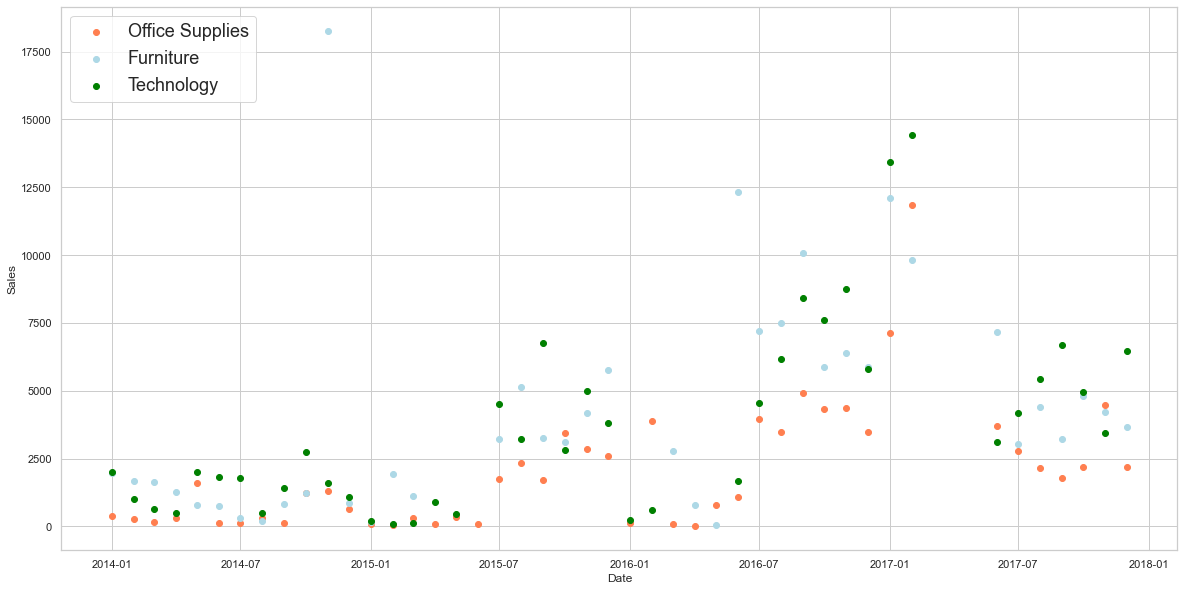

In [105]:
# multiple_scatter = pd.DataFrame()
ofc_sup = df1.loc[df1['Department'] == 'Office Supplies']
Frntr = df1.loc[df1['Department'] == 'Furniture']
Tech = df1.loc[df1['Department'] == 'Technology']

ofc_sup = ofc_sup[['Order Date','Sales']]
ofc_sup.head()
ofc_sup = ofc_sup.sort_values('Order Date')

# Summing Sales per date
ofc_sup = ofc_sup.groupby('Order Date')['Sales'].sum().reset_index()
ofc_sup.head()

ofc_sup = ofc_sup.set_index('Order Date')
ofc_sup.index

Frntr = Frntr[['Order Date','Sales']]
Frntr.head()
Frntr = Frntr.sort_values('Order Date')
Frntr = Frntr.groupby('Order Date')['Sales'].sum().reset_index()
Frntr.head()

Frntr = Frntr.set_index('Order Date')
Frntr.index

Tech = Tech[['Order Date','Sales']]
Tech.head()
Tech = Tech.sort_values('Order Date')
Tech = Tech.groupby('Order Date')['Sales'].sum().reset_index()


Tech = Tech.set_index('Order Date')
Tech.index

monthly1 = ofc_sup['Sales'].resample('MS').mean()
monthly2 = Frntr['Sales'].resample('MS').mean()
monthly3 = Tech['Sales'].resample('MS').mean()

#print(monthly1,monthly2,monthly3)
fig, ax = plt.subplots(figsize=(20,10),sharex=True)
ax.scatter(monthly1.index,monthly1,c='coral',label='Office Supplies')
ax.scatter(monthly2.index,monthly2,c='lightblue',label='Furniture')
ax.scatter(monthly3.index,monthly3,c='green',label = 'Technology')
ax.set_xlabel('Date')

ax.legend(loc='upper left',fontsize=18)

plt.ylabel('Sales',loc='center')


plt.show()

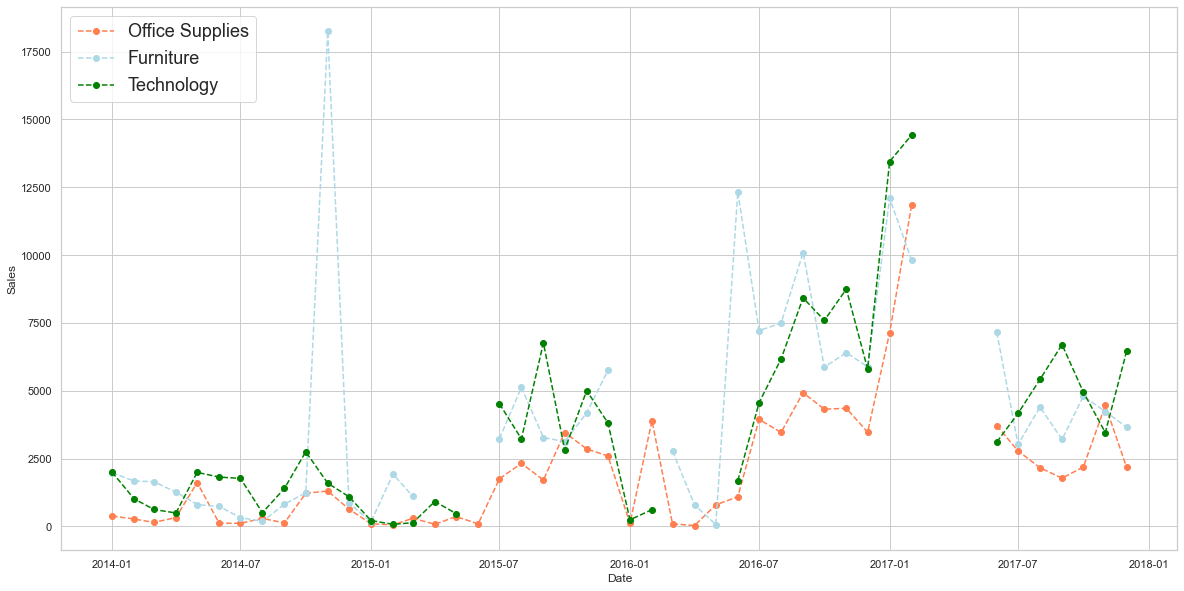

In [106]:
fig, ax = plt.subplots(figsize=(20,10),sharex=True)
ax.plot(monthly1.index,monthly1,'--bo' , c='coral',label='Office Supplies')
ax.plot(monthly2.index,monthly2,'--bo' ,c='lightblue',label='Furniture')
ax.plot(monthly3.index,monthly3,'--bo' ,c='green',label = 'Technology')
ax.set_xlabel('Date')

ax.legend(loc='upper left',fontsize=18)

plt.ylabel('Sales',loc='center')


plt.show()

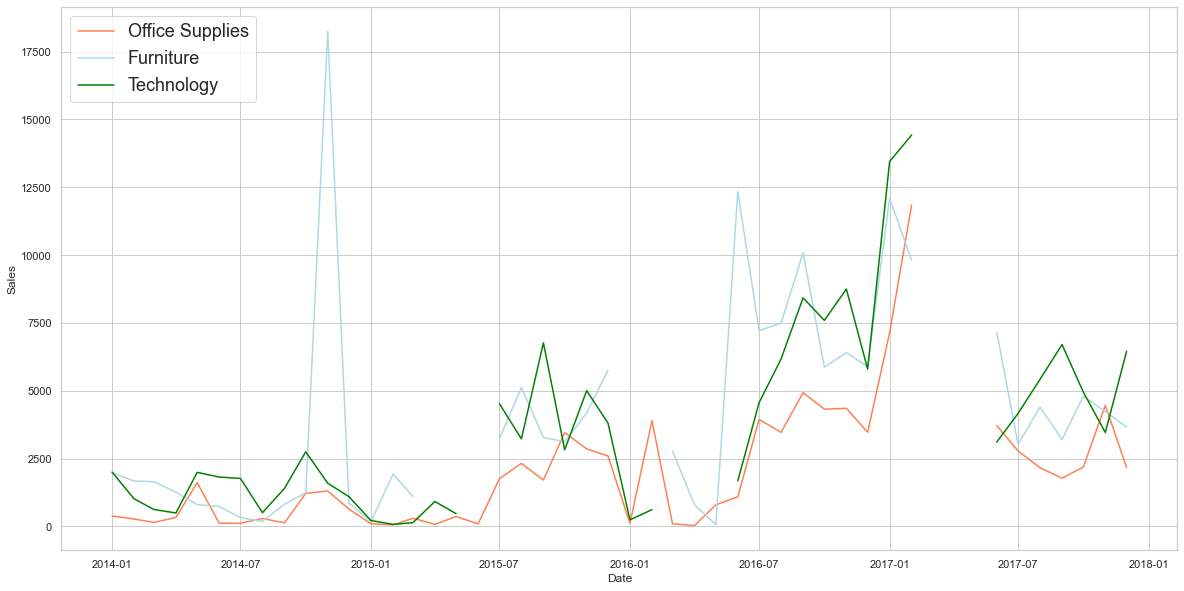

In [107]:
fig, ax = plt.subplots(figsize=(20,10),sharex=True)

style = dict(size=10, color='darkgray')

ax.plot(monthly1.index,monthly1, c='coral',label='Office Supplies')

ax.plot(monthly2.index,monthly2,c='lightblue',label='Furniture')

ax.plot(monthly3.index,monthly3,c='green',label = 'Technology')

ax.set_xlabel('Date')

ax.legend(loc='upper left',fontsize=18)

plt.ylabel('Sales',loc='center')

plt.show()

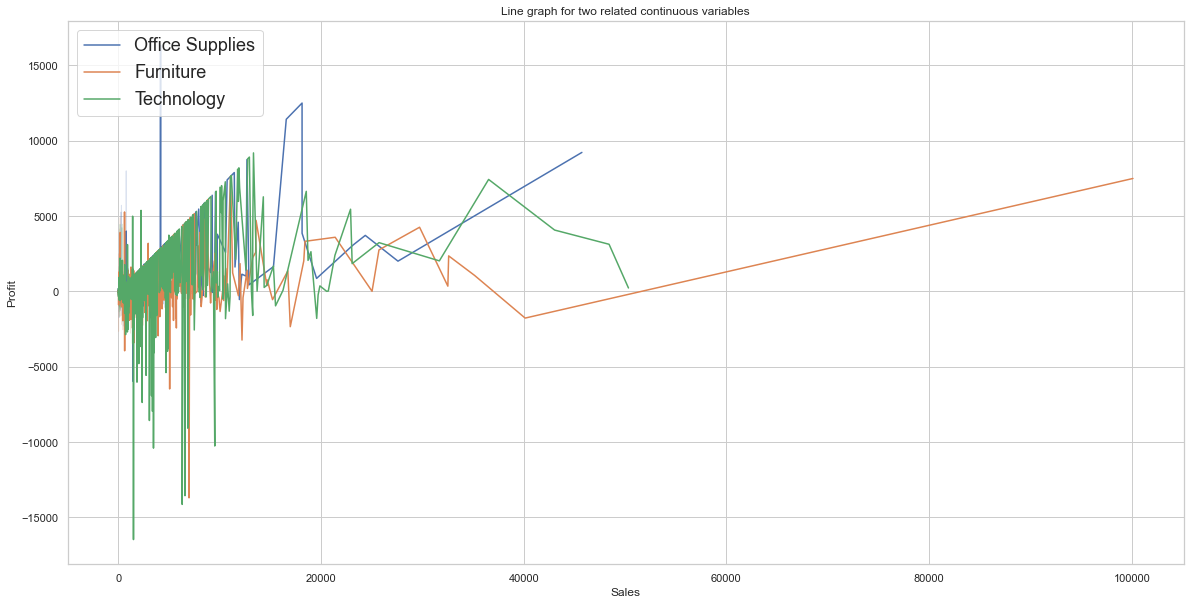

In [108]:

fig, ax = plt.subplots(figsize=(20,10),sharex=True)

style = dict(size=10, color='darkgray')

sns.lineplot(x='Sales', y='Profit', hue='Department', data=df1)

ax.set_xlabel('Sales')

ax.legend(loc='upper left',fontsize=18)

plt.ylabel('Profit',loc='center')
plt.title("Line graph for two related continuous variables")

plt.show()


In [109]:
df_sales = df1.loc[df1['Sales'] > 35000]
#df_sales

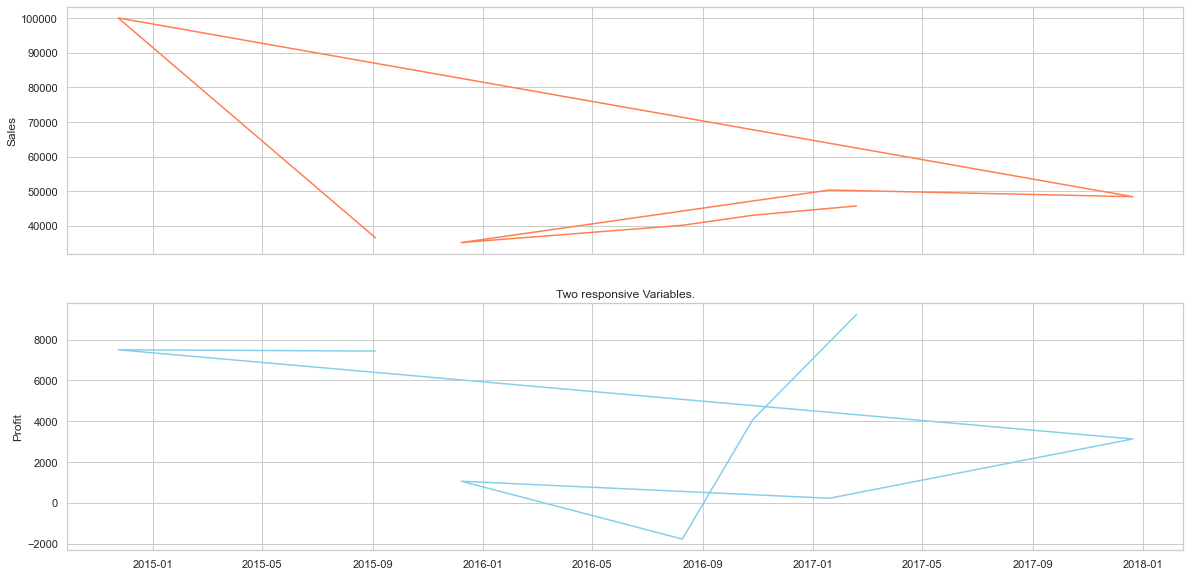

In [110]:
fig, ax = plt.subplots(nrows=2,figsize=(20,10),sharex=True)

style = dict(size=10, color='darkgray')

ax[0].plot(df_sales['Order Date'],df_sales['Sales'], c='coral')
ax[1].plot(df_sales['Order Date'],df_sales['Profit'], c='skyblue')
ax[0].set_ylabel('Sales',loc='center')
ax[1].set_ylabel('Profit',loc='center')
#ax[-1].set_xlabel('Order Date')

plt.title("Two responsive Variables.")

plt.show()


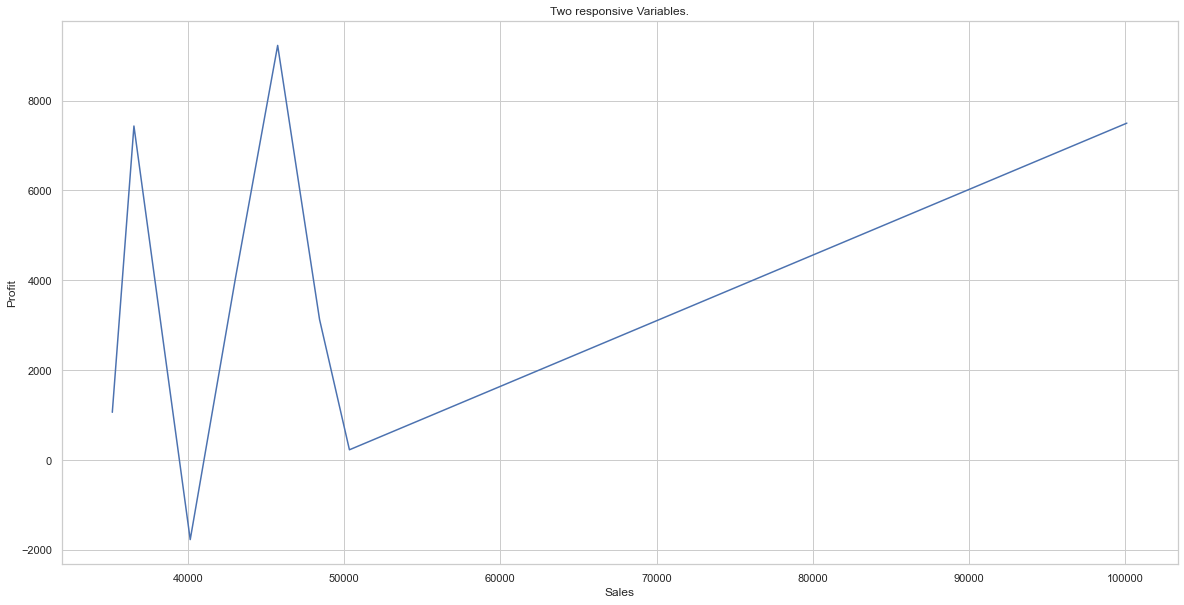

In [111]:
fig, ax = plt.subplots(figsize=(20,10),sharex=True)

style = dict(size=10, color='darkgray')

sns.lineplot( x = df_sales["Sales"],
             y = df_sales["Profit"],
             data = df_sales);

ax.set_ylabel('Profit',loc='center')
ax.set_xlabel('Sales')

plt.title("Two responsive Variables.")

plt.show()